In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv
import numpy as np
import math
import matplotlib.transforms as mtrans

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [290]:
with open("C://Users//k//Documents//Unicamp//IC//rv_webviz_celmar//reservoirviewer_webviz//webviz_plugin_boilerplate//plugins//RV//generated//intermediary_file.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    lineCount = 0
    for row in csv_reader:
        if lineCount == 0:
            max_i: int = pd.to_numeric(row[0])
            max_j: int = pd.to_numeric(row[1])
            num_of_models: int = pd.to_numeric(row[2])
        lineCount = lineCount + 1

colorMap = 'jet'
print("i, j, k: ", max_i, max_j, num_of_models)

i, j, k:  46 69 199


In [304]:
path = "C://Users//k//Documents//Unicamp//IC//rv_webviz_celmar//reservoirviewer_webviz//webviz_plugin_boilerplate//plugins//RV//generated//intermediary_file.csv"
file_content = []
countLine = 0

dimension = math.ceil(math.sqrt(num_of_models))

with open(path) as csv_file:
    for i in range(2):
        next(csv_file)
    for line in (csv_file):
        line.strip()
        if(line == "nan" or line == "nan\n"):
            file_content.append(-1)
        else:    
            file_content.append(int(float(line.strip())))
        countLine = countLine + 1

print(countLine)
file_content = np.array(file_content)
grid = file_content.reshape(num_of_models, max_i*max_j)
print(num_of_models)

631626
199


In [305]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
inertiaAcumulada = 0
bestK = 0
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(grid)
  
    inertias.append(kmeanModel.inertia_)

    mapping2[k] = kmeanModel.inertia_
    
for idx, k in enumerate(mapping2):
    inertiaAcumulada = np.sum(inertias[0:idx])
    inercias = np.sum(inertias)
    
    if (inertiaAcumulada/inercias >= 0.85 ):
        bestK = k
        print(bestK)
        break

13


In [306]:
kmeanModel = KMeans(n_clusters=bestK).fit(grid)
kmeanModel.fit(grid)
y_kmeans = kmeanModel.predict(grid)
dictteste = {}

for idx, g in enumerate(grid):
    dictteste[idx] = y_kmeans[idx]
    
print(dictteste)

{0: 9, 1: 10, 2: 2, 3: 12, 4: 9, 5: 2, 6: 7, 7: 1, 8: 7, 9: 7, 10: 9, 11: 10, 12: 5, 13: 4, 14: 1, 15: 4, 16: 0, 17: 12, 18: 6, 19: 12, 20: 2, 21: 12, 22: 12, 23: 9, 24: 10, 25: 12, 26: 4, 27: 4, 28: 12, 29: 6, 30: 12, 31: 7, 32: 12, 33: 12, 34: 0, 35: 10, 36: 4, 37: 11, 38: 3, 39: 12, 40: 9, 41: 10, 42: 0, 43: 7, 44: 4, 45: 4, 46: 7, 47: 8, 48: 12, 49: 6, 50: 9, 51: 7, 52: 4, 53: 1, 54: 2, 55: 7, 56: 9, 57: 9, 58: 2, 59: 12, 60: 7, 61: 9, 62: 2, 63: 9, 64: 0, 65: 10, 66: 6, 67: 4, 68: 10, 69: 7, 70: 2, 71: 0, 72: 0, 73: 9, 74: 2, 75: 2, 76: 4, 77: 10, 78: 4, 79: 10, 80: 5, 81: 10, 82: 4, 83: 4, 84: 5, 85: 6, 86: 2, 87: 9, 88: 9, 89: 7, 90: 2, 91: 7, 92: 7, 93: 4, 94: 8, 95: 7, 96: 6, 97: 12, 98: 7, 99: 4, 100: 6, 101: 12, 102: 9, 103: 12, 104: 0, 105: 7, 106: 5, 107: 7, 108: 4, 109: 9, 110: 12, 111: 1, 112: 5, 113: 4, 114: 4, 115: 0, 116: 12, 117: 0, 118: 12, 119: 9, 120: 4, 121: 4, 122: 12, 123: 9, 124: 2, 125: 1, 126: 0, 127: 0, 128: 4, 129: 5, 130: 4, 131: 9, 132: 12, 133: 4, 134: 

In [307]:
def mergeSort(alist):
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if dictteste[lefthalf[i]] < dictteste[righthalf[j]]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1

In [308]:
 model = [m for m in range((num_of_models))]
 print(model)

mergeSort(model)

model = np.array(model)

grid = grid[model]
print(model)

newDict = {k: dictteste[k] for k in model}
print(newDict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]
[196 194 161 148 140 127 126 117 115 104  72  71  64  42  34  16 175 125
 111  53  14   7 186 173 172 164 143 141 

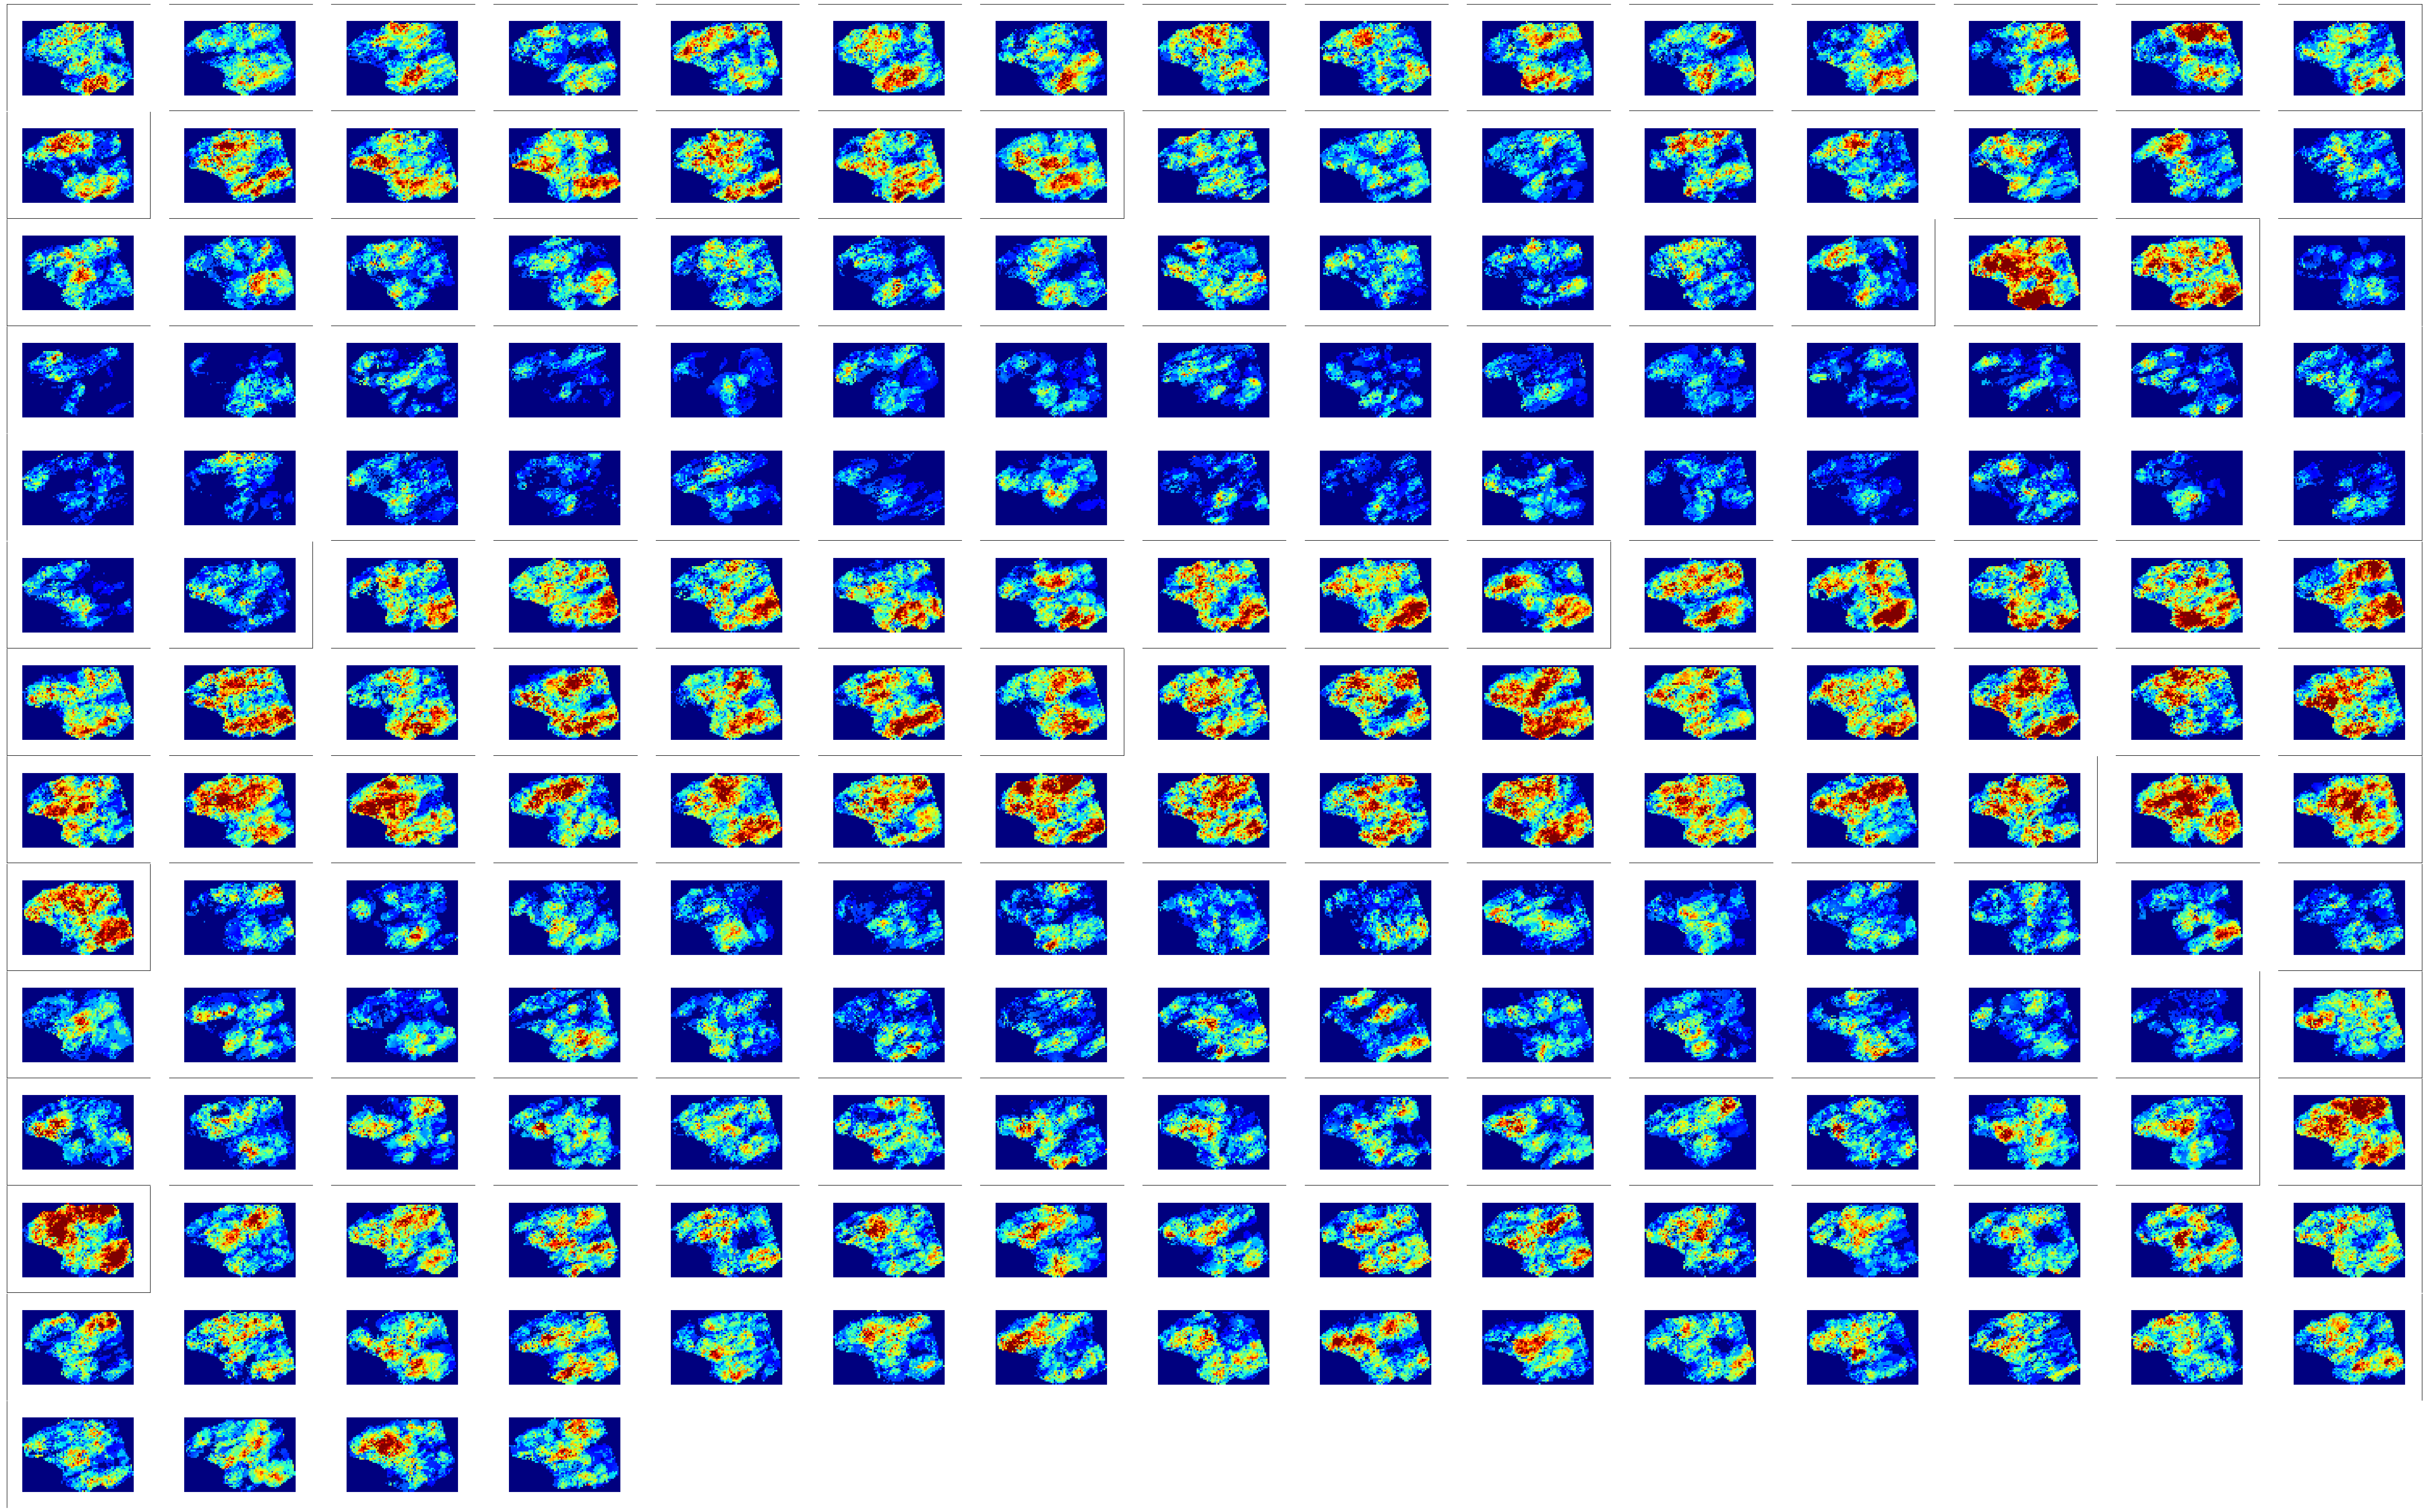

In [311]:
from matplotlib import gridspec

fig = plt.figure(figsize=(max_j, max_i))

grid = grid.reshape(num_of_models,max_i,max_j )

gs = gridspec.GridSpec(dimension, dimension,
                       wspace=0.01, hspace=0.01)

count = 0
for i in range(dimension):
    for j in range(dimension):
        if(count < num_of_models):
            ax = plt.subplot(gs[i, j])
            ax.imshow(grid[count], cmap='jet',
                    interpolation='none', vmin=0, vmax=256)
            
            ax.set_xlim(-10, max_j+10)
            ax.set_ylim(-10, max_i+10)
            
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
            count = count + 1
        else:
            break

all_axes = fig.get_axes()

#show only the outside spines
for index, ax in enumerate(all_axes):
    for sp in ax.spines.values():
        sp.set_visible(False)
        if(index < num_of_models-1):
            if newDict[model[index]] != newDict[model[index+1]]:
                ax.spines['right'].set_visible(True)
        if(index < num_of_models-dimension):
            if newDict[model[index]] != newDict[model[index+dimension]]:
                ax.spines['bottom'].set_visible(True)
                
        if ax.get_subplotspec().is_first_row():
            ax.spines['top'].set_visible(True)
        if ax.get_subplotspec().is_last_row():
            ax.spines['bottom'].set_visible(True)
        if ax.get_subplotspec().is_first_col():
            ax.spines['left'].set_visible(True)
        if ax.get_subplotspec().is_last_col():
            ax.spines['right'].set_visible(True)